# FiveThirtyEight: Star Wars Survey

<br></br>
<i>FiveThirtyEight is a website that uses aggregated data to report on a wide range of topics, including pop culture, economics, politics, and sports. It was founded in 2008, became a licensed feature under the New York Times online in 2010, and acquired by ESPN in 2013. It is currently owned by ABC News.</i>

## Dataset

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

The following code will read the data into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('datasets/star_wars.csv', encoding='ISO-8859-1')

The data has several columns, including:

| Column Name | Description |
|:-----------------|:-------------------------|
| RespondentID | An anonymized ID for the respondent (person taking the survey) |
| Gender | The respondent's gender |
| Age | The respondent's age |
| Household Income | The respondent's income |
| Education | The respondent's education level |
| Location (Census Region) | The respondent's location |
| Have you seen any of the 6 films in the Star Wars franchise? | Has a Yes or No response |
| Do you consider yourself to be a fan of the Star Wars film franchise? | Has a Yes or No response |

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, you'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

In [2]:
star_wars.head(10).T

,0,1,2,3,4,5,6,7,8,9
RespondentID,NaN,3.29288e+09,3.29288e+09,3.29277e+09,3.29276e+09,3.29273e+09,3.29272e+09,3.29268e+09,3.29266e+09,3.29265e+09
Have you seen any of the 6 films in the Star Wars franchise?,Response,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Do you consider yourself to be a fan of the Star Wars film franchise?,Response,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes
Which of the following Star Wars films have you seen? Please select all that apply.,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace,Star Wars: Episode I The Phantom Menace
Unnamed: 4,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,NaN,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones,Star Wars: Episode II Attack of the Clones
Unnamed: 5,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,NaN,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode III Revenge of the Sith
Unnamed: 6,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope,NaN,NaN,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope,Star Wars: Episode IV A New Hope
Unnamed: 7,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back,NaN,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode V The Empire Strikes Back
Unnamed: 8,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi,NaN,NaN,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Star Wars: Episode I The Phantom Menace,3,NaN,1,5,5,1,6,4,5


In [3]:
# remove any rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

# verify that all NaN values have been removed
star_wars['RespondentID'].isnull().sum()

0

## Cleaning and Mapping the Data

### Cleaning Yes/No Columns

Take a look at the next two columns, which are:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. 

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [4]:
yes_no = {'Yes': True, 'No': False}

for i in range(1,3):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(yes_no)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. 
- Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [5]:
series_titles = []
series_headers = {}

def convert_to_bool(series):
    if series in series_titles:
        return True
    else:
        return False

for i in range(3,9):
    # reuse non-Nan column values for new column titles
    new_title = star_wars.iloc[:,i].value_counts().index[0]
    series_titles.append(new_title)
    
    # convert column values to bool
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(convert_to_bool)
    
    # standard new titles
    series_ep = series_titles.index(new_title) + 1
    new_title = 'saw_ep_' + str(series_ep)
    
    # rename headers
    old_title = star_wars.columns[i]
    series_headers[old_title] = new_title
    star_wars = star_wars.rename(columns=series_headers)

In [6]:
star_wars.iloc[:,:9].head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,saw_ep_1,saw_ep_2,saw_ep_3,saw_ep_4,saw_ep_5,saw_ep_6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


### Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

| Column Name | Description |
|:-----------------|:-------------------------|
| Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. | How much the respondent liked Star Wars: Episode I The Phantom Menace |
| Unnamed: 10 | How much the respondent liked Star Wars: Episode II Attack of the Clones |
| Unnamed: 11 | How much the respondent liked Star Wars: Episode III Revenge of the Sith |
| Unnamed: 12 | How much the respondent liked Star Wars: Episode IV A New Hope |
| Unnamed: 13 | How much the respondent liked Star Wars: Episode V The Empire Strikes Back |
| Unnamed: 14 | How much the respondent liked Star Wars: Episode VI Return of the Jedi |

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [7]:
ranks = star_wars.iloc[:,9:15]
star_wars[ranks.columns] = star_wars[ranks.columns].astype(float)

In [8]:
rank_headers = {}

for i in range(6):
    old_title = ranks.columns[i]
    rank_headers[old_title] = 'rank_ep_' + str(i + 1)
    
star_wars = star_wars.rename(columns=rank_headers)

In [9]:
ranks = star_wars.iloc[:,9:15]
ranks.head()

,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


### Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

In [10]:
rank_means = ranks.mean()
rank_means.sort_index(ascending=False)

rank_ep_6    3.047847
rank_ep_5    2.513158
rank_ep_4    3.272727
rank_ep_3    4.341317
rank_ep_2    4.087321
rank_ep_1    3.732934
dtype: float64

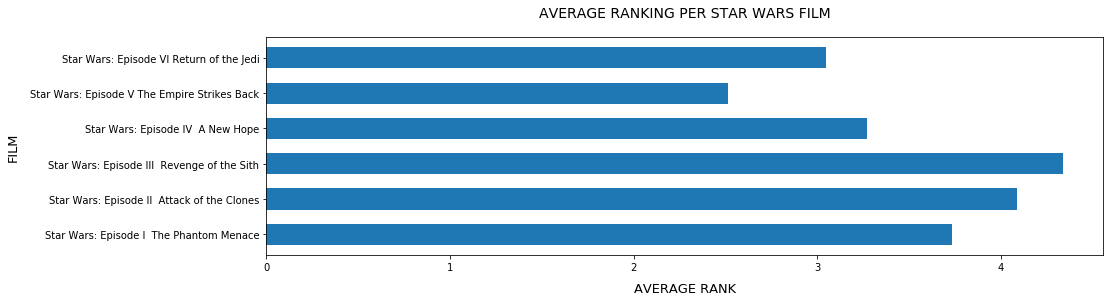

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,4))
ax.barh(rank_means.index, rank_means.values, 0.6)
ax.set_yticklabels(labels=series_titles)
ax.set_xlabel('Average Rank'.upper(), fontsize=13, labelpad=10)
ax.set_ylabel('Film'.upper(), fontsize=13, labelpad=10)
plt.title('Average Ranking Per Star Wars Film'.upper(), fontsize=14, pad=20)            
plt.show()

### Finding the Most Viewed Movie

In [12]:
views = star_wars.iloc[:,3:9]
total_views = views.sum()

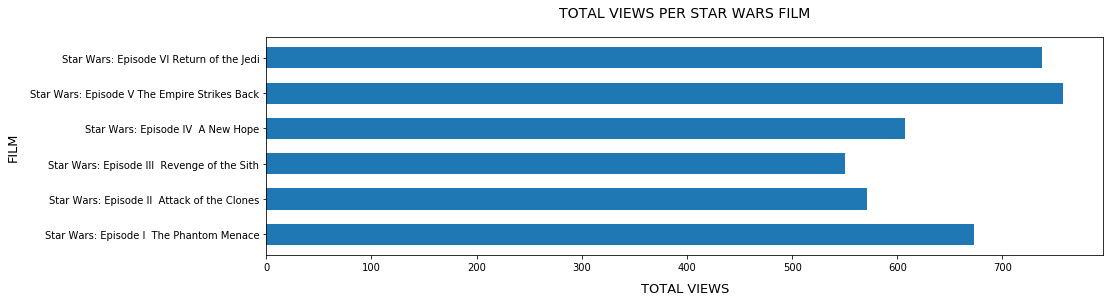

In [13]:
fig, ax = plt.subplots(figsize=(15,4))
ax.barh(total_views.index, total_views.values, 0.6)
ax.set_yticklabels(labels=series_titles)
ax.set_xlabel('Total Views'.upper(), fontsize=13, labelpad=10)
ax.set_ylabel('Film'.upper(), fontsize=13, labelpad=10)
plt.title('Total Views Per Star Wars Film'.upper(), fontsize=14, pad=20)            
plt.show()

In [14]:
rank_means

rank_ep_1    3.732934
rank_ep_2    4.087321
rank_ep_3    4.341317
rank_ep_4    3.272727
rank_ep_5    2.513158
rank_ep_6    3.047847
dtype: float64

In [15]:
total_views

saw_ep_1    673
saw_ep_2    571
saw_ep_3    550
saw_ep_4    607
saw_ep_5    758
saw_ep_6    738
dtype: int64

In [16]:
series_titles

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [17]:
d = {'series_titles' : series_titles,
     'rank_means' : rank_means.values,
     'total_views' : total_views.values
}
summary = pd.DataFrame(data=d)
summary.corr()

,rank_means,total_views
rank_means,1.000000,-0.878126
total_views,-0.878126,1.000000


## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [18]:
def top_ranked_film(df):
    sorted_rank = df.iloc[:,9:15].mean().sort_values()
    top_value = round(sorted_rank.values[0], 2)
    top_index = int(sorted_rank.index[0][-1:]) - 1
    film = series_titles[top_index].replace('Star Wars: Episode ','')
    print('{}: {} Rank'.format(film, top_value))
    
def most_viewed_film(df):
    sorted_views = df.iloc[:,3:9].sum().sort_values(ascending=False)
    most_value = round(sorted_views.values[0], 2)
    most_index = int(sorted_views.index[0][-1:]) - 1
    film = series_titles[most_index].replace('Star Wars: Episode ','')
    print('{}: {} Views'.format(film, most_value))

### Genders

In [19]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

In [20]:
top_ranked_film(males)

V The Empire Strikes Back: 2.46 Rank


In [21]:
most_viewed_film(males)

V The Empire Strikes Back: 392 Views


In [22]:
top_ranked_film(females)

V The Empire Strikes Back: 2.57 Rank


In [23]:
most_viewed_film(females)

V The Empire Strikes Back: 353 Views


### Star Wars Fans

In [24]:
swars_yes = star_wars[star_wars.iloc[:,2] == True]
swars_no = star_wars[star_wars.iloc[:,2] == False]

In [25]:
top_ranked_film(swars_yes)

V The Empire Strikes Back: 2.33 Rank


In [26]:
top_ranked_film(swars_no)

V The Empire Strikes Back: 2.86 Rank


In [27]:
most_viewed_film(swars_yes)

V The Empire Strikes Back: 538 Views


In [28]:
most_viewed_film(swars_no)

V The Empire Strikes Back: 220 Views


### Star Trek Fans

In [29]:
strek_yes = star_wars[star_wars.iloc[:,32] == 'Yes']
strek_no = star_wars[star_wars.iloc[:,32] == 'No']

In [30]:
top_ranked_film(strek_yes)

V The Empire Strikes Back: 2.41 Rank


In [31]:
most_viewed_film(strek_yes)

V The Empire Strikes Back: 397 Views


In [32]:
top_ranked_film(strek_no)

V The Empire Strikes Back: 2.63 Rank


In [33]:
most_viewed_film(strek_no)

V The Empire Strikes Back: 353 Views


That's it for the guided steps! We highly recommend exploring the data further on your own.

Here are some potential next steps:

- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

We highly recommend creating a GitHub repository and placing this project there. It will help other people see your work, including employers. As you start to put multiple projects on GitHub, you'll have the beginnings of a strong portfolio.

You're welcome to keep working on the project here, but we highly recommend downloading it to your computer using the download icon above and working on it there.